[View in Colaboratory](https://colab.research.google.com/github/veersingh007/music-auto_tagging-keras/blob/master/keras_ML_hello_world_fashion_mnist.ipynb)

In [8]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.9.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)


60000

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)


10000

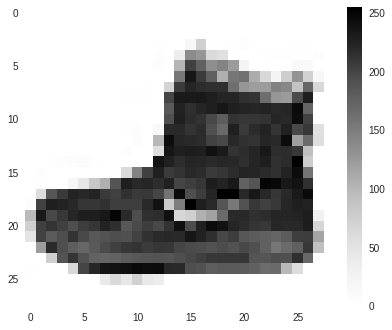

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)


In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0


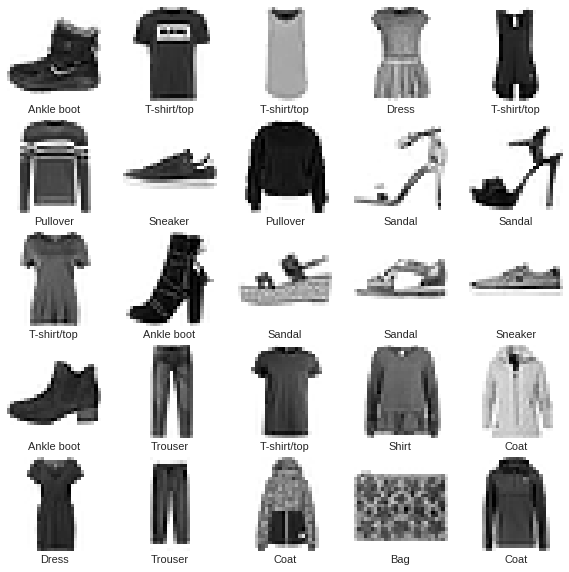

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.4940 - acc: 0.8266
Epoch 2/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.3796 - acc: 0.8650
Epoch 3/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.3375 - acc: 0.8774
Epoch 4/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.3143 - acc: 0.8861
Epoch 5/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.2950 - acc: 0.8915


In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 30us/step
Test accuracy: 0.8788


In [0]:
predictions = model.predict(test_images)


In [26]:
predictions[0]


array([5.7232742e-06, 4.5819846e-07, 1.0409302e-07, 1.9170420e-06,
       1.8426769e-06, 7.8227734e-03, 5.7260254e-06, 4.5438938e-02,
       1.4467585e-04, 9.4657785e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])


9

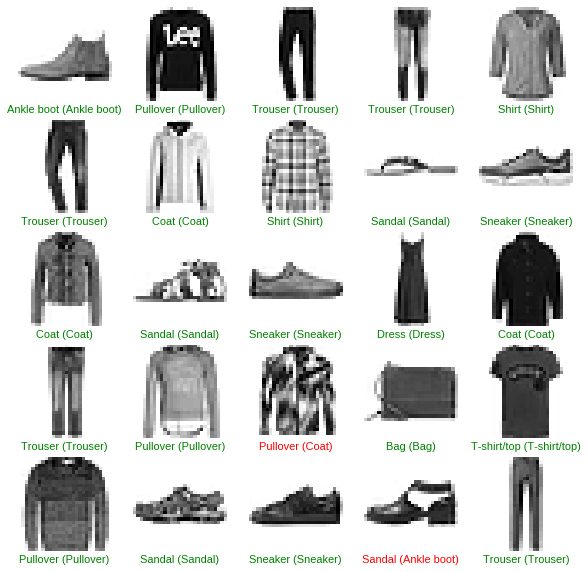

In [28]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

(28, 28)


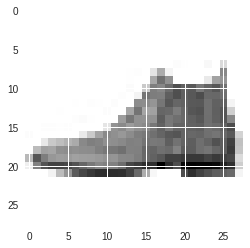

In [40]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)
plt.imshow(img, cmap=plt.cm.binary)


In [37]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)



(1, 28, 28)


In [38]:
predictions = model.predict(img)

print(predictions)


[[5.7232628e-06 4.5819931e-07 1.0409322e-07 1.9170402e-06 1.8426769e-06
  7.8227771e-03 5.7260363e-06 4.5438919e-02 1.4467584e-04 9.4657785e-01]]


In [39]:
prediction = predictions[0]

np.argmax(prediction)


9